In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_df = pd.read_csv(url, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
feature_types = ['numeric', 'numeric', 'numeric', 'numeric']

In [5]:
for feature, ftype in zip(features, feature_types):
    print(f"Feature: {feature} - Type: {ftype}")

Feature: sepal_length - Type: numeric
Feature: sepal_width - Type: numeric
Feature: petal_length - Type: numeric
Feature: petal_width - Type: numeric


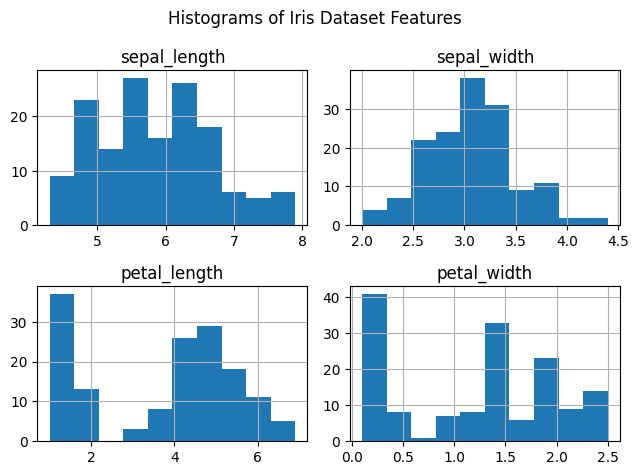

In [6]:
iris_df[features].hist()
plt.suptitle('Histograms of Iris Dataset Features')
plt.tight_layout()
plt.show()

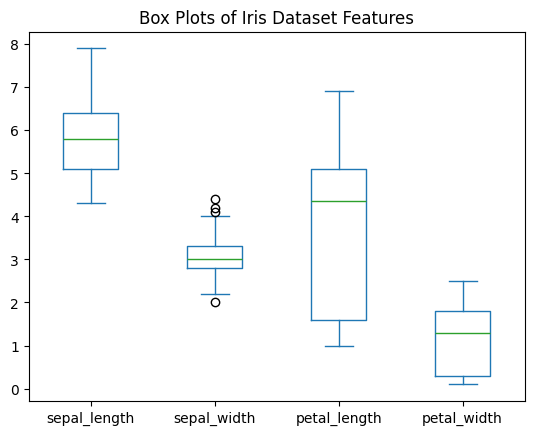


Outliers for feature: sepal_length
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, class]
Index: []

Outliers for feature: sepal_width
    sepal_length  sepal_width  petal_length  petal_width            class
15           5.7          4.4           1.5          0.4      Iris-setosa
32           5.2          4.1           1.5          0.1      Iris-setosa
33           5.5          4.2           1.4          0.2      Iris-setosa
60           5.0          2.0           3.5          1.0  Iris-versicolor

Outliers for feature: petal_length
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, class]
Index: []

Outliers for feature: petal_width
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, class]
Index: []


In [9]:
iris_df[features].plot(kind='box')
plt.title('Box Plots of Iris Dataset Features')
plt.show()

outliers = []
for feature in features:
    q1 = iris_df[feature].quantile(0.25)
    q3 = iris_df[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    feature_outliers = iris_df[(iris_df[feature] < lower_bound) | (iris_df[feature] > upper_bound)]
    outliers.append(feature_outliers)

for feature, outlier_df in zip(features, outliers):
    print(f"\nOutliers for feature: {feature}")
    print(outlier_df)